In [144]:
# Importing Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as nm
from mpl_toolkits.mplot3d import Axes3D
% matplotlib inline

In [3]:
!ls

1 Titanic Data Analysis.ipynb
2 US Facility-Level Air Pollution.ipynb
3 Indian Premier League (Cricket).ipynb
README.md
datasets


In [7]:
# Read Dataset
df = pd.read_csv("datasets/titanic.csv")

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Printing first five tuples
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Stats
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


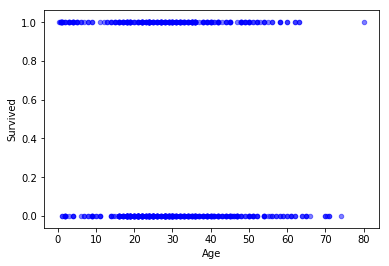

In [142]:
#scatter plot between survived and age
df.plot(kind='scatter',x='Age',y='Survived',color="blue",alpha='0.5')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


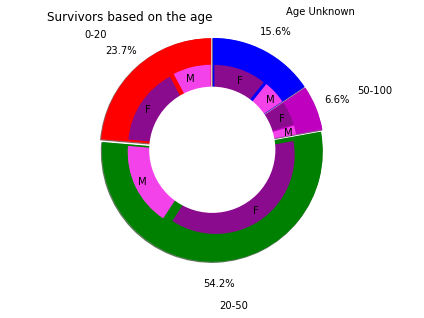

In [184]:
vals=[df[df.Age<20].Survived.sum()
,df[(df.Age>20)&(df.Age<50)].Survived.sum()
,df[(df.Age>50)&(df.Age<100)].Survived.sum(),df[df.Age.isnull()].Survived.sum()]
label_name=["0-20","20-50","50-100","Age Unknown"]
gender=[df[(df.Sex=="male")&(df.Survived==1)&(df.Age<20)].Name.count(),df[(df.Sex=="female")&(df.Survived==1)&(df.Age<20)].Name.count()
        ,df[(df.Sex=="male")&(df.Survived==1)&(df.Age>20)&(df.Age<50)].Name.count(),df[(df.Sex=="female")&(df.Survived==1)&(df.Age>20)&(df.Age<50)].Name.count()
        ,df[(df.Sex=="male")&(df.Survived==1)&(df.Age>50)&(df.Age<100)].Name.count(),df[(df.Sex=="female")&(df.Survived==1)&(df.Age>50)&(df.Age<100)].Name.count()
        ,df[(df.Sex=="male")&(df.Survived==1)&(df.Age.isnull())].Name.count(),df[(df.Sex=="female")&(df.Survived==1)&(df.Age.isnull())].Name.count()
       ]
#ax1=plt.subplot2grid((6,6),(0,0),rowspan=3,colspan=2)
plt.pie(vals,labels=label_name,explode=(0.05,0.05,0.05,0.05),colors=["r","g","m","b"],autopct="%1.1f%%",startangle=90,shadow=True,radius=3.5,pctdistance=1.2,labeldistance=1.4)
plt.pie(gender,labels=['M','F','M','F','M','F','M','F'],explode=(0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2),colors=["#f442eb","#8a0b8e","#f442eb","#8a0b8e","#f442eb","#8a0b8e","#f442eb","#8a0b8e"],startangle=90,radius=2.5,labeldistance=0.85)
#ax2.scatter(x=df.Age,y=df.Survived,color='blue')
cir=plt.Circle((0,0),2,fc="white")
plt.gcf().gca().add_artist(cir)
plt.title('Survivors based on the age',horizontalalignment='right')
plt.axis('equal')
plt.tight_layout()
plt.show()